In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [5]:
# in the normal flow we need to scale the data > but in Naive Bayesian there is no need to scale the data
# normalization not required because we calculate the probability that is based on the Guassian or Coundting methods
# they include the u and sigma for each classes

split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [8]:
X_test[0], y_test[0]

(array([    1,    46, 59000], dtype=int64), 0)

In [11]:
X_train.shape , y_train.shape

((320, 3), (320,))

In [16]:
X_train[y_train==0].shape

(214, 3)

In [40]:
sample = X_test[13]
out = y_test[13]

'''
P(c0 | x) * P(x) = P1
P(c1 | x) * P(x)= P2
'''

# p_c0 = y_train[y_train == 0].shape[0] / y_train.shape[0]
p_c0 = np.mean(y_train==0)

# binary
p_x1_c0 = np.mean(X_train[y_train==0][:,0] == sample[0])

#continous > ( 1 / (( 2 * np.pi)**0.5 * sigma_c)) * np.exp((-(x - mu_c) ** 2) / (2 * sigma_c ** 2))
#sigma_c0 = np.std(X_train[y_train==0][:,1]) 
# 1 means get the std on the col1
sigma_1c0 = np.std(X_train[y_train==0, 1])
mu_1c0 = np.mean(X_train[y_train==0, 1])
sigma_2c0 = np.std(X_train[y_train==0, 2])
mu_2c0 = np.mean(X_train[y_train==0,2])

p_x2_c0 = ( 1 / (( 2 * np.pi)**0.5 * sigma_1c0)) * np.exp((-(sample[1] - mu_1c0) ** 2) / (2 * sigma_1c0 ** 2))
p_x3_c0 = ( 1 / (( 2 * np.pi)**0.5 * sigma_2c0)) * np.exp((-(sample[2] - mu_2c0) ** 2) / (2 * sigma_2c0 ** 2))

a0 = p_x1_c0 * p_x2_c0 * p_x3_c0
p0 = a0 * p_c0
print("class0 probability: ", p0)

#################################
p_c1 = np.mean(y_train==1)

p_x1_c1 = np.mean(X_train[y_train==1][:,0] == sample[0])

sigma_1c1 = np.std(X_train[y_train==1, 1])
mu_1c1 = np.mean(X_train[y_train==1, 1])
sigma_2c1 = np.std(X_train[y_train==1, 2])
mu_2c1 = np.mean(X_train[y_train==1,2])

p_x2_c1 = ( 1 / (( 2 * np.pi)**0.5 * sigma_1c1)) * np.exp((-(sample[1] - mu_1c0) ** 2) / (2 * sigma_1c1 ** 2))
p_x3_c1 = ( 1 / (( 2 * np.pi)**0.5 * sigma_2c1)) * np.exp((-(sample[2] - mu_2c0) ** 2) / (2 * sigma_2c1 ** 2))

a1 = p_x1_c1 * p_x2_c1 * p_x3_c1
p1 = a1 * p_c1
print("class1 probability: ", p1)

print("the input features: ", sample)
print("pridcited output: ", 1 if p1>p0 else 0)
print("actual label: ", out)


class0 probability:  1.9370078388867968e-07
class1 probability:  6.327874677904009e-08
the input features:  [    0    33 41000]
pridcited output:  0
actual label:  0


In [42]:
from sklearn.naive_bayes import GaussianNB
# it apply guassian for all types of data no matter categorical or not

In [43]:
'''
priors > the probability of each class > imbalanced calsses
''' 
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [46]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.896875
0.8625


(array([ 5.,  0.,  7.,  0.,  7.,  0.,  0.,  4.,  0.,  5.,  0.,  6.,  0.,
         0.,  9.,  0.,  6.,  0.,  0., 16.,  0., 13.,  0., 12.,  0.,  0.,
        10.,  0., 11.,  0., 11.,  0.,  0.,  9.,  0.,  9.,  0.,  0.,  6.,
         0., 32.,  0., 12.,  0.,  0., 20.,  0., 13.,  0.,  0., 15.,  0.,
        15.,  0., 16.,  0.,  0., 16.,  0.,  3.,  0.,  2.,  0.,  0.,  7.,
         0., 12.,  0.,  0., 14.,  0., 14.,  0., 10.,  0.,  0.,  4.,  0.,
         3.,  0.,  6.,  0.,  0.,  5.,  0.,  4.,  0.,  0.,  3.,  0.,  3.,
         0.,  5.,  0.,  0.,  6.,  0.,  7.,  0.,  7.]),
 array([18.  , 18.42, 18.84, 19.26, 19.68, 20.1 , 20.52, 20.94, 21.36,
        21.78, 22.2 , 22.62, 23.04, 23.46, 23.88, 24.3 , 24.72, 25.14,
        25.56, 25.98, 26.4 , 26.82, 27.24, 27.66, 28.08, 28.5 , 28.92,
        29.34, 29.76, 30.18, 30.6 , 31.02, 31.44, 31.86, 32.28, 32.7 ,
        33.12, 33.54, 33.96, 34.38, 34.8 , 35.22, 35.64, 36.06, 36.48,
        36.9 , 37.32, 37.74, 38.16, 38.58, 39.  , 39.42, 39.84, 40.26,
        

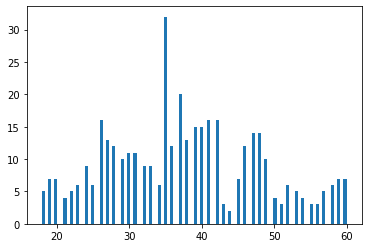

In [47]:
plt.hist(X[:,1],bins=100)